# The Machine Learning Pipeline with a Random Forest Classifier and SVM Classifier
### Simon Kennedy
### 5/6/2022

## Task 1

Write code to load the dataset and run the machine learning pipeline using two different 
classifiers. 



## Machine Learning Pipeline

# 1. Problem definition

Propose a classifier with the best performance predicting the class of wine on the wine dataset from scikit learn.


# 2. Data Ingestion

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
wine = load_wine()

print(wine.target_names)

['class_0' 'class_1' 'class_2']


# 3. Data Preparation

In [2]:
X = wine.data
y = wine.target

X.shape, y.shape

((178, 13), (178,))

### Scaling the descriptive features with StandardScaler()

In [3]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit(X)
X_std = std_scale.transform(X)

pd.DataFrame(X_std,y).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


# 4. Data Segregation

### Split the data into training and testing

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y, random_state=42)
# test_size is default 0.25 if train_size also none. i.e. train = 0.75, train = 0.25
#defining a seed to get the same split in the data

In [5]:
X_train.shape

(133, 13)

In [6]:
X_test.shape

(45, 13)

# 5. Model Training

### Model 1. Random Forest

#### Defining the Random Forest model and running the machine learning pipeline

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)

modelRF = make_pipeline(rf)
modelRF = rf.fit(X_train, y_train)
RF_y_preds = modelRF.predict(X_test)
accuracy_score(y_test, RF_y_preds)

1.0

A score of 1 suggests a perfect model. Lets challenge this with a different metric such as cross validation score with 10 folds as this will use the data differently for testing.

In [8]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(modelRF, X_test,y_test,cv=10)
cv_scores_rf

array([1. , 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ])

In [9]:
print("mean: ", cv_scores_rf.mean())

mean:  0.9800000000000001


The cross validation score of 0.9800 being less than 1 is more useful as we can attempt to improve upon this with hyperparameter tuning.

### Model 2. SVM Classifier

#### Defining the SVC model and running the machine learning pipeline

In [10]:
from sklearn.svm import SVC 

svc = SVC(kernel ='rbf', class_weight='balanced')

modelSVC = make_pipeline(svc) # we build the model with svc

modelSVC.fit(X_train, y_train)
SVC_y_preds = modelSVC.predict(X_test)
accuracy_score(y_test, SVC_y_preds)

0.9777777777777777

**Cross validation score for SVC**

* to keep the metrics consistent with the Random Forest model so that comparisons are uniform.

In [11]:
cv_scores_svc = cross_val_score(modelSVC, X_test, y_test,cv=10)
cv_scores_svc.mean()

0.9550000000000001

The cross-validated score (mean) has produced a lower score than the accuracy score above.

This will be the main metric that we aim to improve with hyperparmeter tuning.

# Task 2 Model evaluation

Evaluate the performance of each classifier by computing their accuracy and other scores 
on the same validation data. 

## Hyperparameter tuning Random Forest


In [12]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 


parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridRF = GridSearchCV(rf, parameters, cv = 3, verbose = 1, 
                      n_jobs = -1)
gridRF.fit(X_train, y_train)
gridRF.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

**Assigning the optimal parameters to the model, then fitting and getting the new predictions. Then the cross validated score is obtained.**

In [13]:
rf_optimal = RandomForestClassifier(random_state = 42, 
                                   max_depth = 5,     
                                   n_estimators = 300, 
                                   min_samples_split = 2, 
                                   min_samples_leaf = 1)

modelRF_optimal = rf_optimal.fit(X_train, y_train)

RF_optimal_y_preds = modelRF_optimal.predict(X_test)

rf_cv_scores_optimal = cross_val_score(modelRF_optimal, X_test,y_test,cv=10)

print(rf_cv_scores_optimal.mean())

0.9800000000000001


Original cross validation score (mean) = 0.9800, Tuned cross validation score (mean) = 0.9800.
There is no improvement by tuning the hyperparameters.

## Random Forest Classification Report wtih precision, recall and accuracy

In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, RF_optimal_y_preds, target_names = ['Class 0', 'Class 1', 'Class 2']))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        15
     Class 1       1.00      1.00      1.00        18
     Class 2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Confusion matrix for Random Forest Classifier

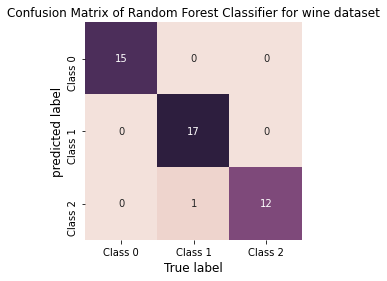

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_predict = cross_val_predict(modelRF_optimal,X_test, y_test, cv = 10)

cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['Class 0', 'Class 1', 'Class 2'],
           yticklabels= ['Class 0', 'Class 1', 'Class 2'], cmap=cmap)
plt.xlabel('True label', size=12)
plt.ylabel('predicted label', size=12)
plt.title('Confusion Matrix of Random Forest Classifier for wine dataset')
plt.show()

The accuracy report shows perfect prediction regarding precision recall and accuracy. However, when using the cross validated predictions the confusion matrix shows 1 error where class 1 was incorrected predicted as class 2.

As previously stated the cross validation score with 10 folds is more sensitive for this model and this data.

## SVC Hyperparamater tuning - GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

#Searching for the optimal from param_grid
gridSVC = GridSearchCV(modelSVC, param_grid, cv=5)

%time gridSVC.fit(X_train, y_train)
print('best parameters for SVC', gridSVC.best_params_)

Wall time: 139 ms
best parameters for SVC {'svc__C': 50, 'svc__gamma': 0.005}


**Assigning the best parameters to the SVC model using grid.best_estimator_ and then fitting**

In [17]:
modelSVC_optimal = gridSVC.best_estimator_

#storing the predictions in y_predict_SVC_optimal
SVC_optimal_y_preds = modelSVC_optimal.predict(X_test)

**Repeating the cross validation score on the optimal SVC model**

In [18]:
cv_scores_svc_optimal = cross_val_score(modelSVC_optimal, X_test,y_test,cv=10)
cv_scores_svc_optimal.mean()

0.9800000000000001

Oringinal cross validated score = 0.9800, Optimal cross validated score is 0.9800. There is no improvement.

**Printing the classification report wtih precision, recall and accuracy**

In [19]:
from sklearn.metrics import classification_report 

print(accuracy_score(y_test, SVC_optimal_y_preds))
print()
print(classification_report(y_test, SVC_optimal_y_preds, target_names = ['Class 0', 'Class 1', 'Class 2']))

0.9777777777777777

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        15
     Class 1       1.00      0.94      0.97        18
     Class 2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**Confusion Matrix for SVC**

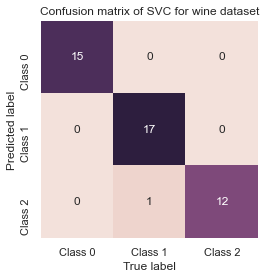

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

SVC_cv_y_preds = cross_val_predict(modelSVC_optimal,X_test, y_test, cv = 10)

cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, SVC_cv_y_preds)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           xticklabels= ['Class 0', 'Class 1', 'Class 2'],
           yticklabels= ['Class 0', 'Class 1', 'Class 2'], cmap=cmap)

plt.xlabel('True label', size=12)
plt.ylabel('Predicted label', size=12)
plt.title('Confusion matrix of SVC for wine dataset')
plt.show()

Only 1 incorrect prediction using the test data. Class 1 was once predicted as Class 2.

# Summary

In [22]:
from tabulate import tabulate

In [25]:
#create data
data = [["Random Forest", 1.0, 0.9800, 1.0, 0.9800, 0, 0], 
        ["SVC", 0.9778, 0.9550, 0.9778, 0.9800, 0, 0.025]]
  
#define header names
col_names = ["Model", "PreTuneAcc", "PreTuneCV", "PostTuneAcc", "PostTuneCV", "ImpAccuracy", "ImpCVscore"]
  
#display table
print(tabulate(data, headers=col_names))

Model            PreTuneAcc    PreTuneCV    PostTuneAcc    PostTuneCV    ImpAccuracy    ImpCVscore
-------------  ------------  -----------  -------------  ------------  -------------  ------------
Random Forest        1             0.98          1               0.98              0         0
SVC                  0.9778        0.955         0.9778          0.98              0         0.025


The Random Forest model has the highest accuracy score post tuning, however the SVC model an equal cross validated score post tuning.

The accuracy metric doesn't appear as sensitive as the cross validated score for this data and these models. 

The hyperparameter tuning has not improved the accuracy metrics of the Random Forest model, however it has improved the cross validated score of the SVC by 0.025. It appears that the similarity in scores is due to a relatively small sample size, especially for the testing sample.